# Phishing Link Detection Machine Learning

Jonathan Christyadi (502705) - AI Core 02


This notebook aims at predicting the likelihood of a link being a phishing link or a legitimate link with a focus on exploring and testing hypotheses that necessitate further research.


Dataset: https://data.mendeley.com/datasets/c2gw7fy2j4/3

In [1]:
import sklearn
import pandas as pd
import seaborn
import numpy as np
print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pd.__version__)            # 1.5.1
print("seaborn version:", seaborn.__version__)          # 0.12.1

scikit-learn version: 1.3.0
pandas version: 2.0.3
seaborn version: 0.12.2


# 📦 Data provisioning

After loading the dataset, I found out some inconsistencies among the data. First the label of the link (phishing or legitimate) can be changed into binary format. Also, for domain_with_copyright column, some are in binary and some are written in alphabets, for example: zero, One, etc.

In [2]:
df = pd.read_csv("Data\dataset_link_phishing.csv", sep=',', index_col=False, dtype='unicode')
df.head()

id                                                url url_length  \
0  0     http://www.progarchives.com/album.asp?id=61737         46   
1  1  http://signin.eday.co.uk.ws.edayisapi.dllsign....        128   
2  2  http://www.avevaconstruction.com/blesstool/ima...         52   
3  3                              http://www.jp519.com/         21   
4  4                       https://www.velocidrone.com/         28   

  hostname_length ip total_of. total_of- total_of@ total_of? total_of&  ...  \
0              20  0         3         0         0         1         0  ...   
1             120  0        10         0         0         0         0  ...   
2              25  0         3         0         0         0         0  ...   
3              13  0         2         0         0         0         0  ...   
4              19  0         2         0         0         0         0  ...   

  domain_in_title domain_with_copyright whois_registered_domain  \
0               1                   one                       0   
1               1                  zero                       0   
2               1                  zero                       0   
3               1                   one                       0   
4               0                  zero                       0   

  domain_registration_length domain_age web_traffic dns_record google_index  \
0                        627       6678       78526          0            0   
1                        300         65           0          0            1   
2                        119       1707           0          0            1   
3                        130       1331           0          0            0   
4                        164       1662      312044          0            0   

  page_rank      status  
0         5    phishing  
1         0    phishing  
2         0    phishing  
3         0  legitimate  
4         4  legitimate  

[5 rows x 87 columns]

In [3]:
# Taking a look at the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          19431 non-null  object
 1   url                         19431 non-null  object
 2   url_length                  19431 non-null  object
 3   hostname_length             19431 non-null  object
 4   ip                          19431 non-null  object
 5   total_of.                   19431 non-null  object
 6   total_of-                   19431 non-null  object
 7   total_of@                   19431 non-null  object
 8   total_of?                   19431 non-null  object
 9   total_of&                   19431 non-null  object
 10  total_of=                   19431 non-null  object
 11  total_of_                   19431 non-null  object
 12  total_of~                   19431 non-null  object
 13  total_of%                   19431 non-null  ob

In [4]:
# Sampling the dataset
df.sample(10)

id                                                url url_length  \
4525   4525  https://www.documentcloud.org/documents/246219...         96   
1938   1938  https://www.simplypsychology.org/psychosexual....         50   
13915  5914  https://mail.parkhill.k12.mo.us/owa/auth/logon...        123   
7115   7115  http://www.online-tech-tips.com/free-software-...         75   
7892   7892  http://www.true-piano-lessons.com/free-piano-l...         57   
8664    663  https://www.ulrc.go.ug/scripts/?cliente=3D6624...         51   
9152   1151             http://www.straighttalkforthesoul.com/         38   
6346   6346               http://safelinknojutsu.blogspot.com/         36   
7989   7989  http://www.softpedia.com/get/System/File-Manag...         76   
5394   5394  https://20200724065829-dot-s2pe7ed9y.rj.r.apps...         70   

      hostname_length ip total_of. total_of- total_of@ total_of? total_of&  \
4525               21  1         3         6         0         0         0   
1938               24  0         3         0         0         0         0   
13915              23  1         9         0         0         1         1   
7115               24  0         2         6         0         0         0   
7892               26  0         3         4         0         0         0   
8664               14  1         3         0         0         1         0   
9152               30  1         2         0         0         0         0   
6346               28  0         2         0         0         0         0   
7989               17  0         3         3         0         0         0   
5394               45  1         5         2         0         0         0   

       ... domain_in_title domain_with_copyright whois_registered_domain  \
4525   ...               1                  zero                       0   
1938   ...               1                  zero                       0   
13915  ...               1                     0                       1   
7115   ...               1                   one                       0   
7892   ...               1                  zero                       0   
8664   ...               1                     0                       0   
9152   ...               1                     1                       0   
6346   ...               1                   one                       0   
7989   ...               1                  zero                       0   
5394   ...               1                  zero                       0   

      domain_registration_length domain_age web_traffic dns_record  \
4525                         379       4368       31458          0   
1938                        1964       3515       10338          0   
13915                          0         -1      105946          0   
7115                         636       4843        5881          0   
7892                         169         -1     1003956          0   
8664                           0        421    10587379          0   
9152                         359       1466           0          0   
6346                         373       7296     1488112          0   
7989                         698       6242        2409          0   
5394                         228       5616           0          0   

      google_index page_rank      status  
4525             0         6  legitimate  
1938             0         5  legitimate  
13915            1         4    phishing  
7115             0         5  legitimate  
7892             0         3  legitimate  
8664             0         3    phishing  
9152             0         2  legitimate  
6346             0         5  legitimate  
7989             0         6  legitimate  
5394             1         5    phishing  

[10 rows x 87 columns]

# Preprocessing

## 🆔 Encoding


After understanding the data on the sample, I found that some data are not in a good form and there is a room for improvement, such as the `domain_with_copyright` and `status` columns.

In [5]:
df['status'].unique()

array(['phishing', 'legitimate'], dtype=object)

As you can see on the status column, there are only 2 values, phishing and legitimate. Which mean I can transform it into binary values (0 and 1). 

In [6]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})
df.head()

id                                                url url_length  \
0  0     http://www.progarchives.com/album.asp?id=61737         46   
1  1  http://signin.eday.co.uk.ws.edayisapi.dllsign....        128   
2  2  http://www.avevaconstruction.com/blesstool/ima...         52   
3  3                              http://www.jp519.com/         21   
4  4                       https://www.velocidrone.com/         28   

  hostname_length ip total_of. total_of- total_of@ total_of? total_of&  ...  \
0              20  0         3         0         0         1         0  ...   
1             120  0        10         0         0         0         0  ...   
2              25  0         3         0         0         0         0  ...   
3              13  0         2         0         0         0         0  ...   
4              19  0         2         0         0         0         0  ...   

  domain_in_title domain_with_copyright whois_registered_domain  \
0               1                   one                       0   
1               1                  zero                       0   
2               1                  zero                       0   
3               1                   one                       0   
4               0                  zero                       0   

  domain_registration_length domain_age web_traffic dns_record google_index  \
0                        627       6678       78526          0            0   
1                        300         65           0          0            1   
2                        119       1707           0          0            1   
3                        130       1331           0          0            0   
4                        164       1662      312044          0            0   

  page_rank status  
0         5      1  
1         0      1  
2         0      1  
3         0      0  
4         4      0  

[5 rows x 87 columns]

After a closer look, I spotted that there are some inconsistencies with the value on `domain_with_copyright` column, for example One and one. Similarly, I want to transform it into binary value 0 and 1, instead of the string

In [7]:
df['domain_with_copyright'].unique()

array(['one', 'zero', 'One', 'Zero', '1', '0'], dtype=object)

In [8]:
df['domain_with_copyright'] = df['domain_with_copyright'].map({'one': 1, 'zero': 0, 'Zero': 0, 'One': 1,'1': 1, '0': 0}).astype(int)
df['domain_with_copyright'].unique()

array([1, 0])

### Checking null or NaN values

In [9]:
# Calculate the total number of missing values in the DataFrame
total_na = df.isna().sum()

In [10]:
# Calculate the total number of missing values in the DataFrame
total_null = df.isnull().sum()
total_null.sum()

0

Making a function to check which feature contain binary values.

In [11]:
# Finding columns with binary values

def count_binary_columns(df):
    results = []
    counter = 0
    for col in df.columns:
        counter += 1
        if df[col].isin([0, 1]).all():
            results.append(col)
    return results, counter


count_binary_columns(df)

(['domain_with_copyright', 'status'], 87)

In [12]:
df = df.drop(columns=['id', 'url'])
df.head()

url_length hostname_length ip total_of. total_of- total_of@ total_of?  \
0         46              20  0         3         0         0         1   
1        128             120  0        10         0         0         0   
2         52              25  0         3         0         0         0   
3         21              13  0         2         0         0         0   
4         28              19  0         2         0         0         0   

  total_of& total_of= total_of_  ... domain_in_title domain_with_copyright  \
0         0         1         0  ...               1                     1   
1         0         0         0  ...               1                     0   
2         0         0         0  ...               1                     0   
3         0         0         0  ...               1                     1   
4         0         0         0  ...               0                     0   

  whois_registered_domain domain_registration_length domain_age web_traffic  \
0                       0                        627       6678       78526   
1                       0                        300         65           0   
2                       0                        119       1707           0   
3                       0                        130       1331           0   
4                       0                        164       1662      312044   

  dns_record google_index page_rank status  
0          0            0         5      1  
1          0            1         0      1  
2          0            1         0      1  
3          0            0         0      0  
4          0            0         4      0  

[5 rows x 85 columns]

In [13]:
df['whois_registered_domain'].unique()

array(['0', '1'], dtype=object)

status
0    9716
1    9715
Name: count, dtype: int64


<Axes: title={'center': 'Count the target variable'}, xlabel='status'>

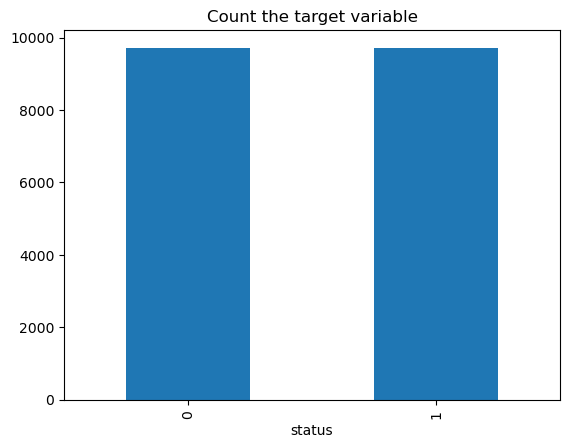

In [14]:
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='bar', title='Count the target variable')    


# 💡 Feature selection

A heatmap will be used to select a suitable set of features to predict the `status` target upon. At this stage, I have zero idea which feature to use and I utilized heatmap to find features with the most corellation with the target feature.

### Data Visualization

First, to determine which feature to be used on the model, I want to visualize the correlation of the features.

### Creating a heatmap to visualize the correlation between the features


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(100, 100))
plot = sns.heatmap(corr, annot=True, fmt='.2f', linewidths=2)


### Sorting the feature correlation values

To select the most suitable features for predicting the target variable (status), a heatmap was created to visualize the correlation between the features. By analyzing the heatmap, we can identify the features that have the highest positive or negative correlation with the target variable.

### Features Plot Bar

Now I want to make a bar plot of the correlation with the target variable, which helps me to identify the important featueres, understand the relationship and simplify it.

<Axes: title={'center': 'Correlation with the target variable'}>

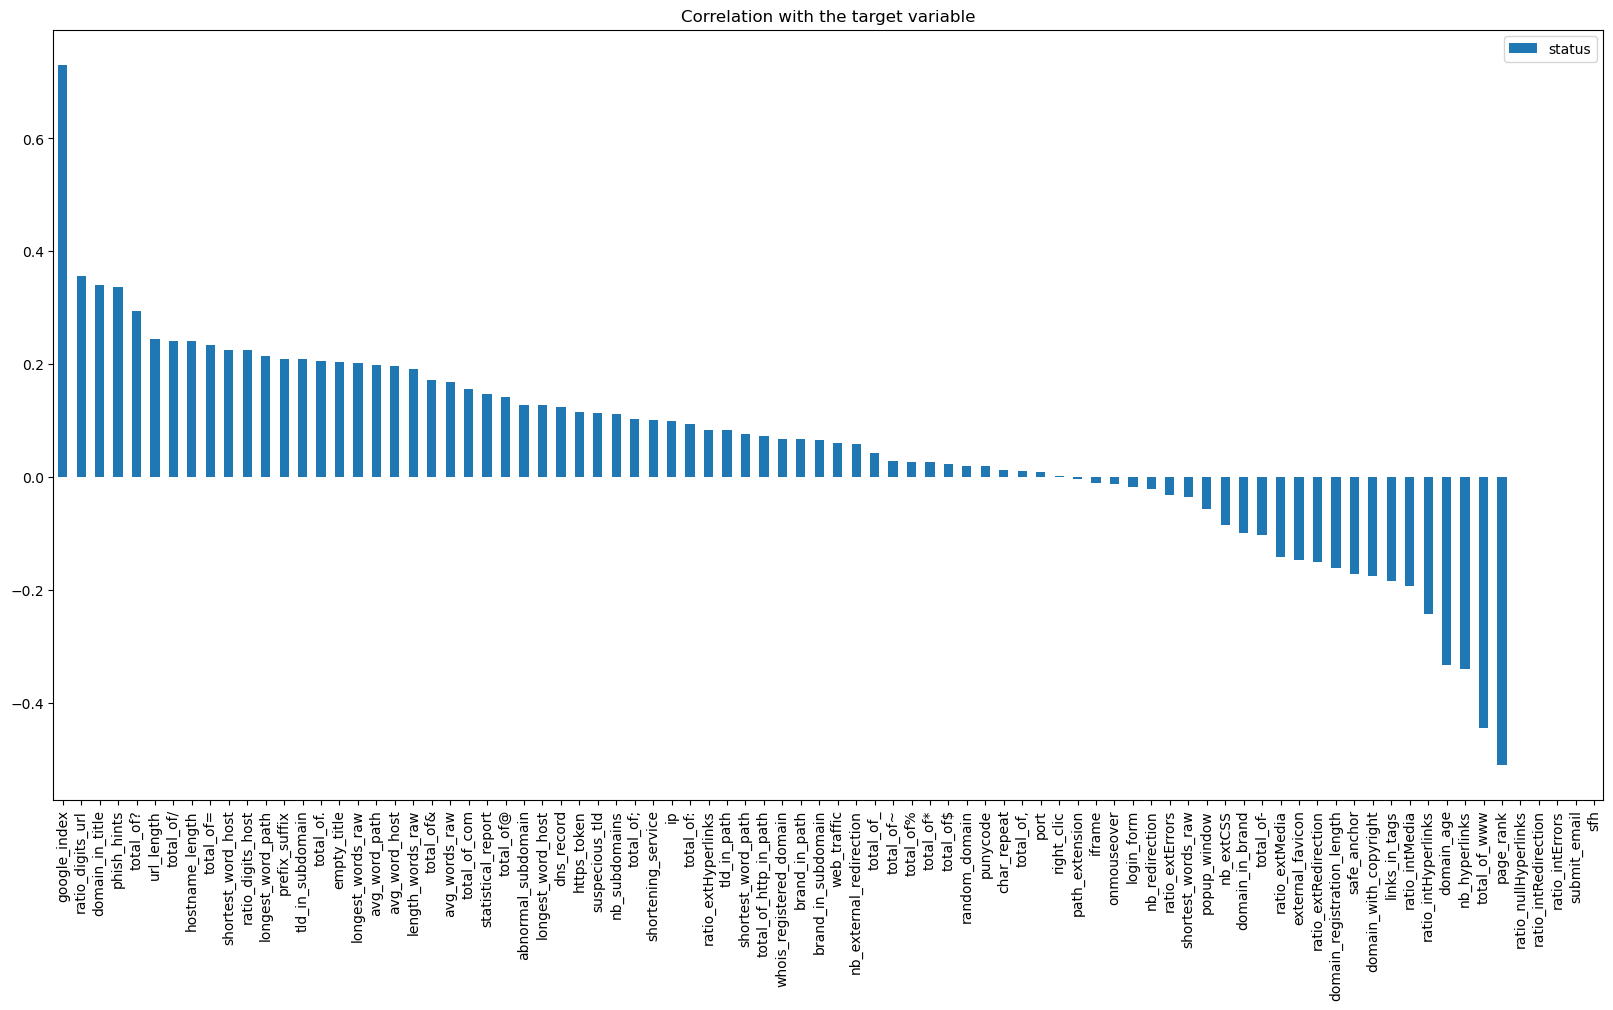

In [16]:
# Sorting the correlation values with the target variable in descending order
corr.drop('status').sort_values(by='status', ascending=False).plot.bar(y='status', title='Correlation with the target variable', figsize=(20, 10))

### Finding the most correlated features with the target variable based on numerical values

It can be seen on the plot bar that there are alot of features, I want to narrow it down by finding features with the most correlation in terms of numerical value.

In [17]:
# Finding the most correlated features with the target variable based on numerical featrures excluding NaN values
correlation_matrix = df.corr(numeric_only=True)
sorted_corr = correlation_matrix.sort_values(by='status',ascending=False)
sorted_corr

domain_with_copyright    status
status                             -0.175469  1.000000
domain_with_copyright               1.000000 -0.175469

#### Displaying the top correlated features along with their correlation values.

On the left side is the feature name and on the right side is the correlation values which indicates the strength and direction of the correlation between each features and target variable

In [18]:
# Get all the correlated features with the target variable
num_features = len(sorted_corr['status']) # 15 features
sorted_corr['status'].head(num_features)

status                   1.000000
domain_with_copyright   -0.175469
Name: status, dtype: float64

#### Selecting the features

Now I can utilize the features (except the target variable) with the most correlation into the model.

In [19]:
# List the features from the previous step into a list
selected_features = ['google_index', 'ratio_digits_url', 'domain_in_title', 'phish_hints', 'total_of?', 'url_length', 'total_of/','hostname_length','total_of.', 'total_of-','domain_with_copyright','nb_hyperlinks','total_of_www','page_rank']
df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Check the data types of the selected columns after conversion
print(df[selected_features].dtypes)

# Check if 'status' column exists and has categorical or numerical data
print(df['status'].dtype)

# Create a DataFrame with the selected columns
selected_df = df[selected_features + ['status']]
selected_df.head()

google_index               int64
ratio_digits_url         float64
domain_in_title            int64
phish_hints                int64
total_of?                  int64
url_length                 int64
total_of/                  int64
hostname_length            int64
total_of.                  int64
total_of-                  int64
domain_with_copyright      int32
nb_hyperlinks              int64
total_of_www               int64
page_rank                  int64
dtype: object
int64


google_index  ratio_digits_url  domain_in_title  phish_hints  total_of?  \
0             0          0.108696                1            0          1   
1             1          0.054688                1            2          0   
2             1          0.000000                1            0          0   
3             0          0.142857                1            0          0   
4             0          0.000000                0            0          0   

   url_length  total_of/  hostname_length  total_of.  total_of-  \
0          46          3               20          3          0   
1         128          3              120         10          0   
2          52          4               25          3          0   
3          21          3               13          2          0   
4          28          3               19          2          0   

   domain_with_copyright  nb_hyperlinks  total_of_www  page_rank  status  
0                      1            143             1          5       1  
1                      0              0             0          0       1  
2                      0              3             1          0       1  
3                      1            404             1          0       0  
4                      0             57             1          4       0

In [20]:
# Count the number of binary columns in the selected features
features_binary = count_binary_columns(df[selected_features])
features_binary


(['google_index', 'domain_in_title', 'domain_with_copyright'], 14)

#### Data Scaling

Now I scale the data appropriately.

In [21]:
# from sklearn.preprocessing import StandardScaler
# # Scale the data
# selected_df = selected_df.dropna()
# scaler = StandardScaler()
# selected_df[selected_features] = scaler.fit_transform(selected_df[selected_features])


#### Pairplot

Visualize the correlations, distributions, and patterns between multiple variables in the dataset. 

c:\Users\jochr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


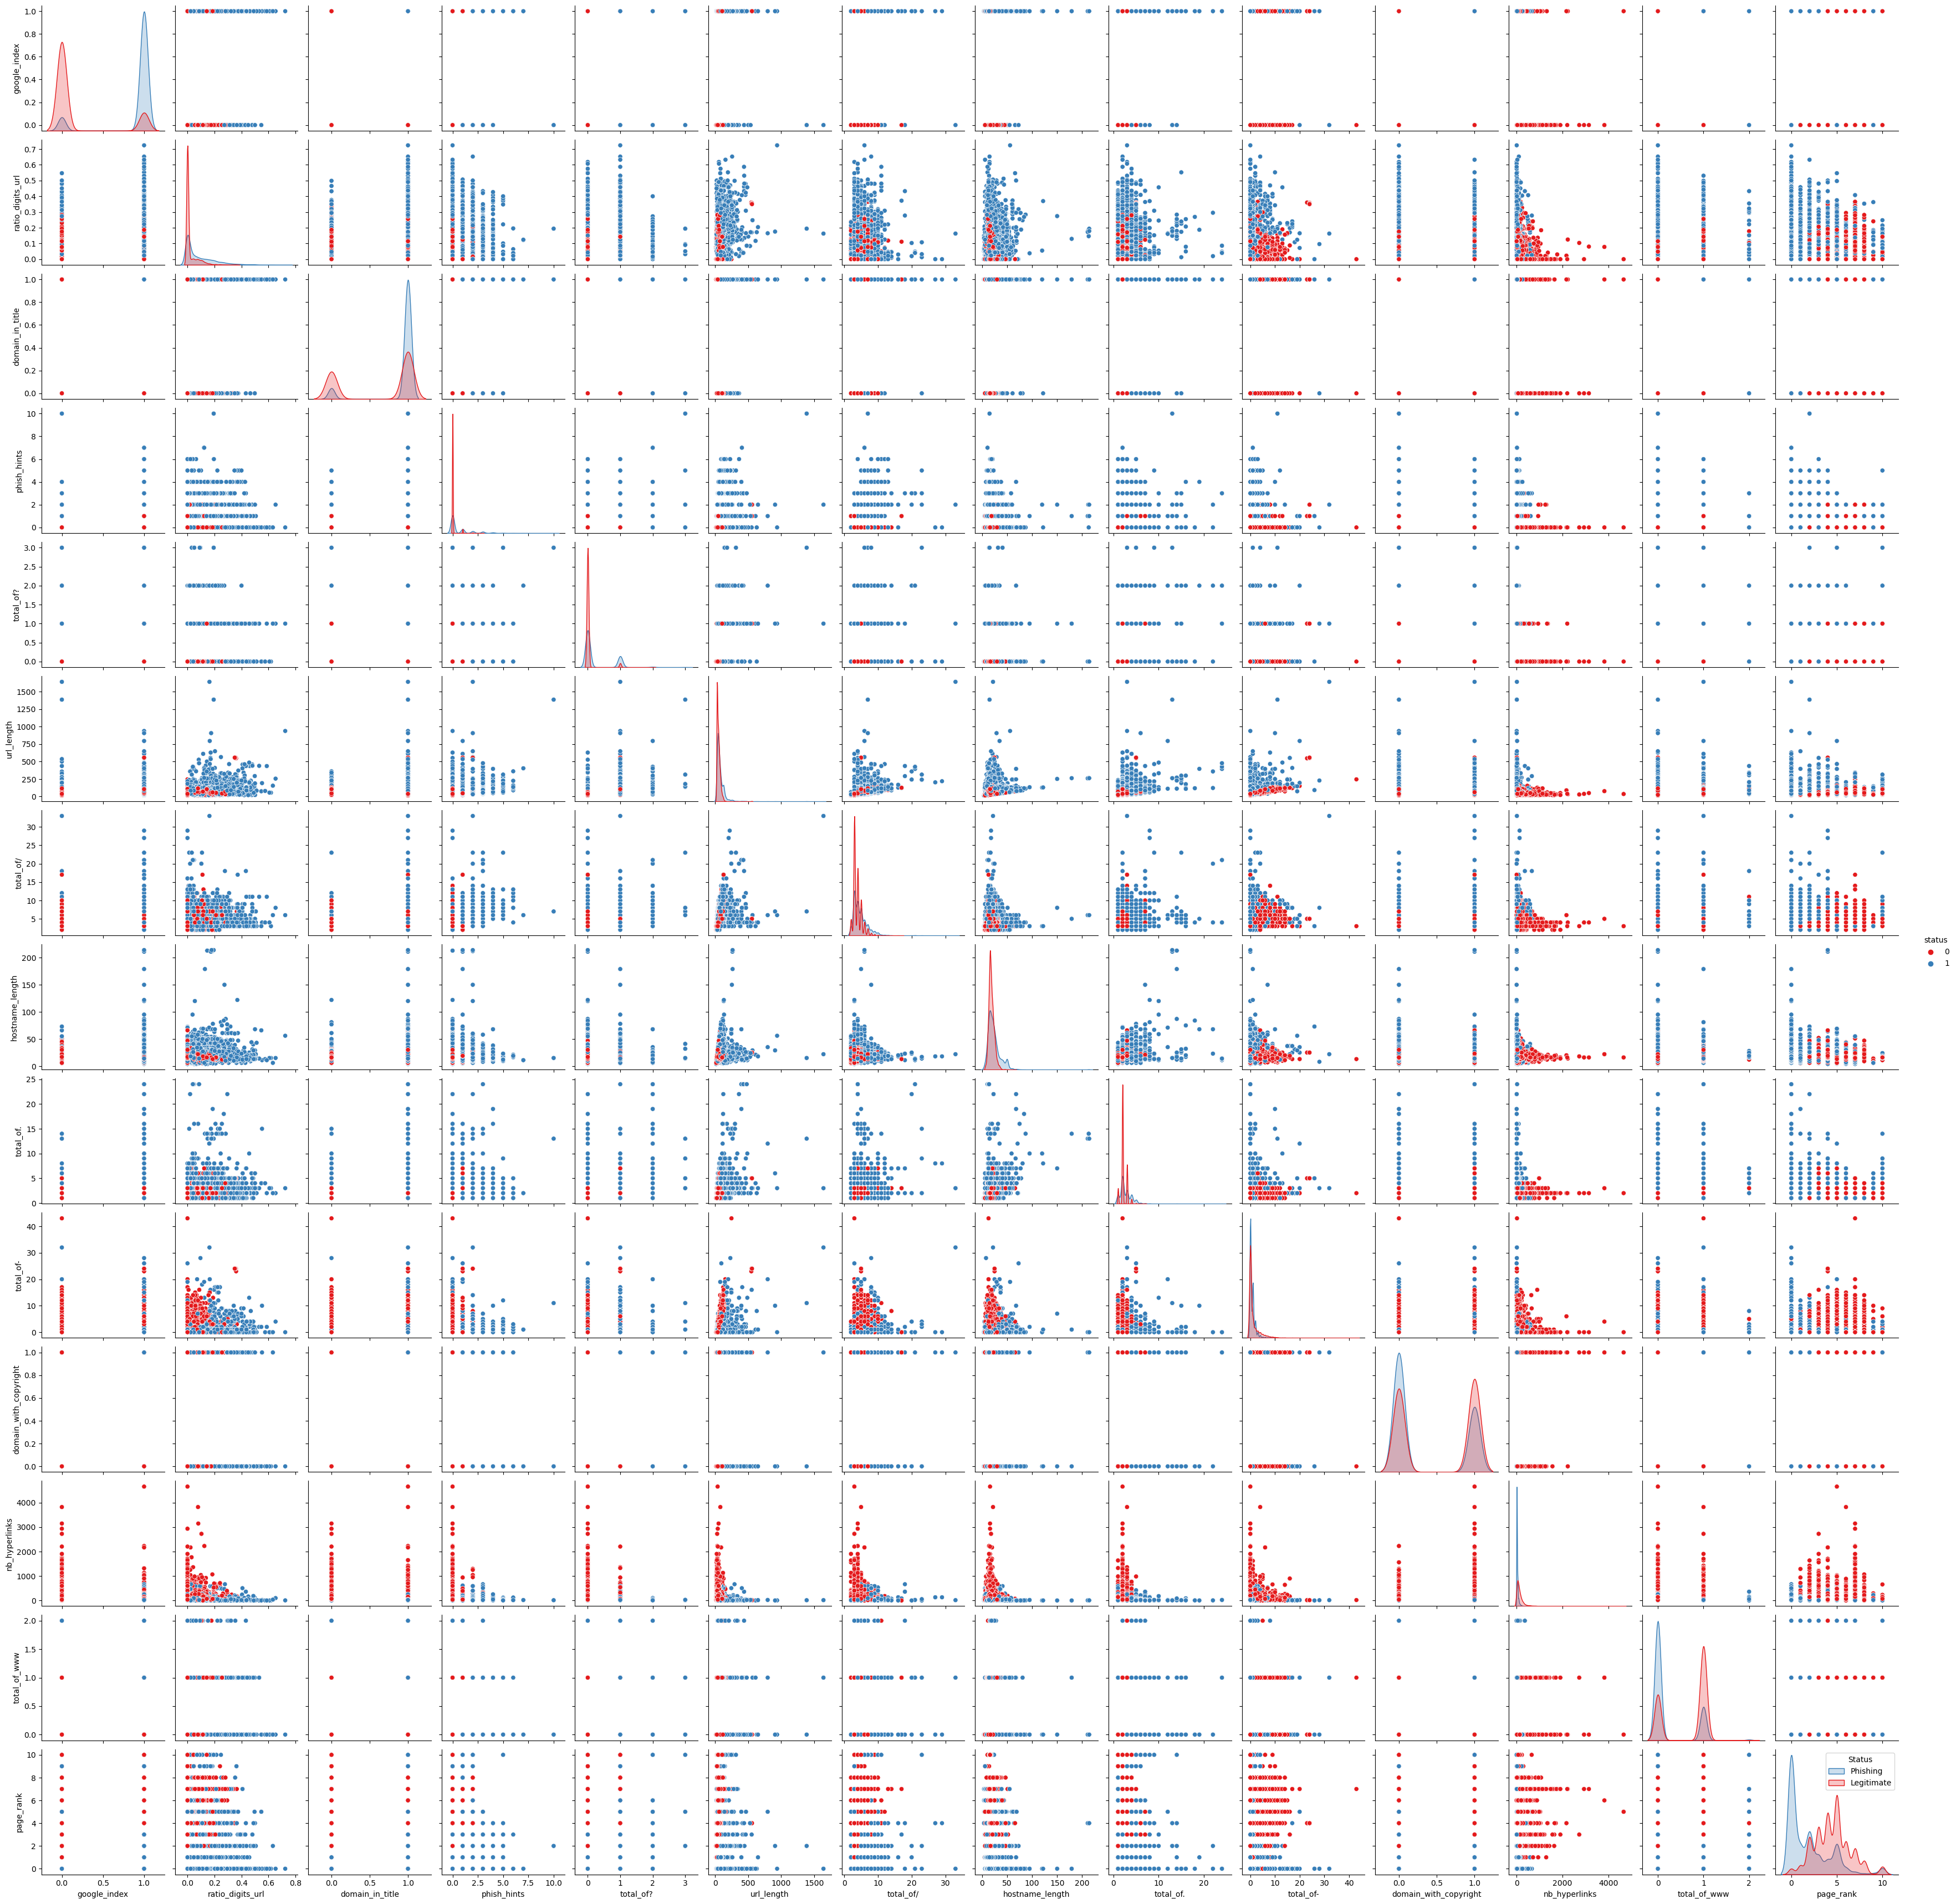

In [22]:
# Create pairplot
sns.pairplot(selected_df, hue='status', palette='Set1')

# Add legends
plt.legend(title='Status', labels=['Phishing', 'Legitimate'])

# Show the plot
plt.show()

#### Defining target variable and feature variables

In this section I want to split the target and feature variables into X and y.

In [23]:
target = 'status'

X = df[selected_features]
y = df[target]

## 🪓 Splitting into train/test

Splitting the train and test set 80% and 20% respectively. So around 15.5k are in train set and 4k in test set.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 19431 observations, of which 15544 are now in the train set, and 3887 in the test set.


# 🧬 Modelling

In this section, I want to try a few different models and how they perform compared to other models. Also, at the end I will stack some of the models. 


### Support Vector Machine

This code trains a Support Vector Machine (SVM) classifier, a powerful algorithm used for classification tasks. The SVM learns to classify data points into different categories based on their features.

In [25]:
# SUPPORT VECTOR MACHINE SVM
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
SVM_score = SVM.score(X_test, y_test)
print("Accuracy:", SVM_score)

Accuracy: 0.8350913300746077


This code generates a classification report for the predictions made by a Support Vector Machine (SVM) model.

In [26]:
from sklearn.metrics import classification_report
predictions = SVM.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1915
           1       0.82      0.86      0.84      1972

    accuracy                           0.84      3887
   macro avg       0.84      0.83      0.83      3887
weighted avg       0.84      0.84      0.83      3887



### Linear Regression

This code trains a Linear Regression model, which is a simple method used for predicting numeric values based on input features.

In [27]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_score = linear.score(X_test, y_test)
print("R²:", linear_score)

R²: 0.6845519239341518


### 🏘️ K-NEAREST NEIGBOURS

This code implements the K-Nearest Neighbors (KNN) classification algorithm. KNN works by finding the 'k' nearest data points in the training set to a given input, and the majority class among those neighbors is assigned to the input.

In [28]:
# K-NEAREST NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)
KNN_score = KNN.score(X_test, y_test)
print("Accuracy:", KNN_score)

Accuracy: 0.9024954978132236


### 🌲Decision Tree

This code trains a decision tree classifier, a type of machine learning model used for classification tasks. Then, it evaluates the accuracy of the model on test data and prints the accuracy score.

In [35]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(min_samples_leaf=40, min_samples_split=300)
decision_tree.fit(X_train, y_train)
DT_score = decision_tree.score(X_test, y_test)
print("Accuracy:", DT_score)

Accuracy: 0.9313094931824029


This code visualizes a decision tree model using a graphical representation. It sets up target names for the classes ("phishing" and "legitimate")

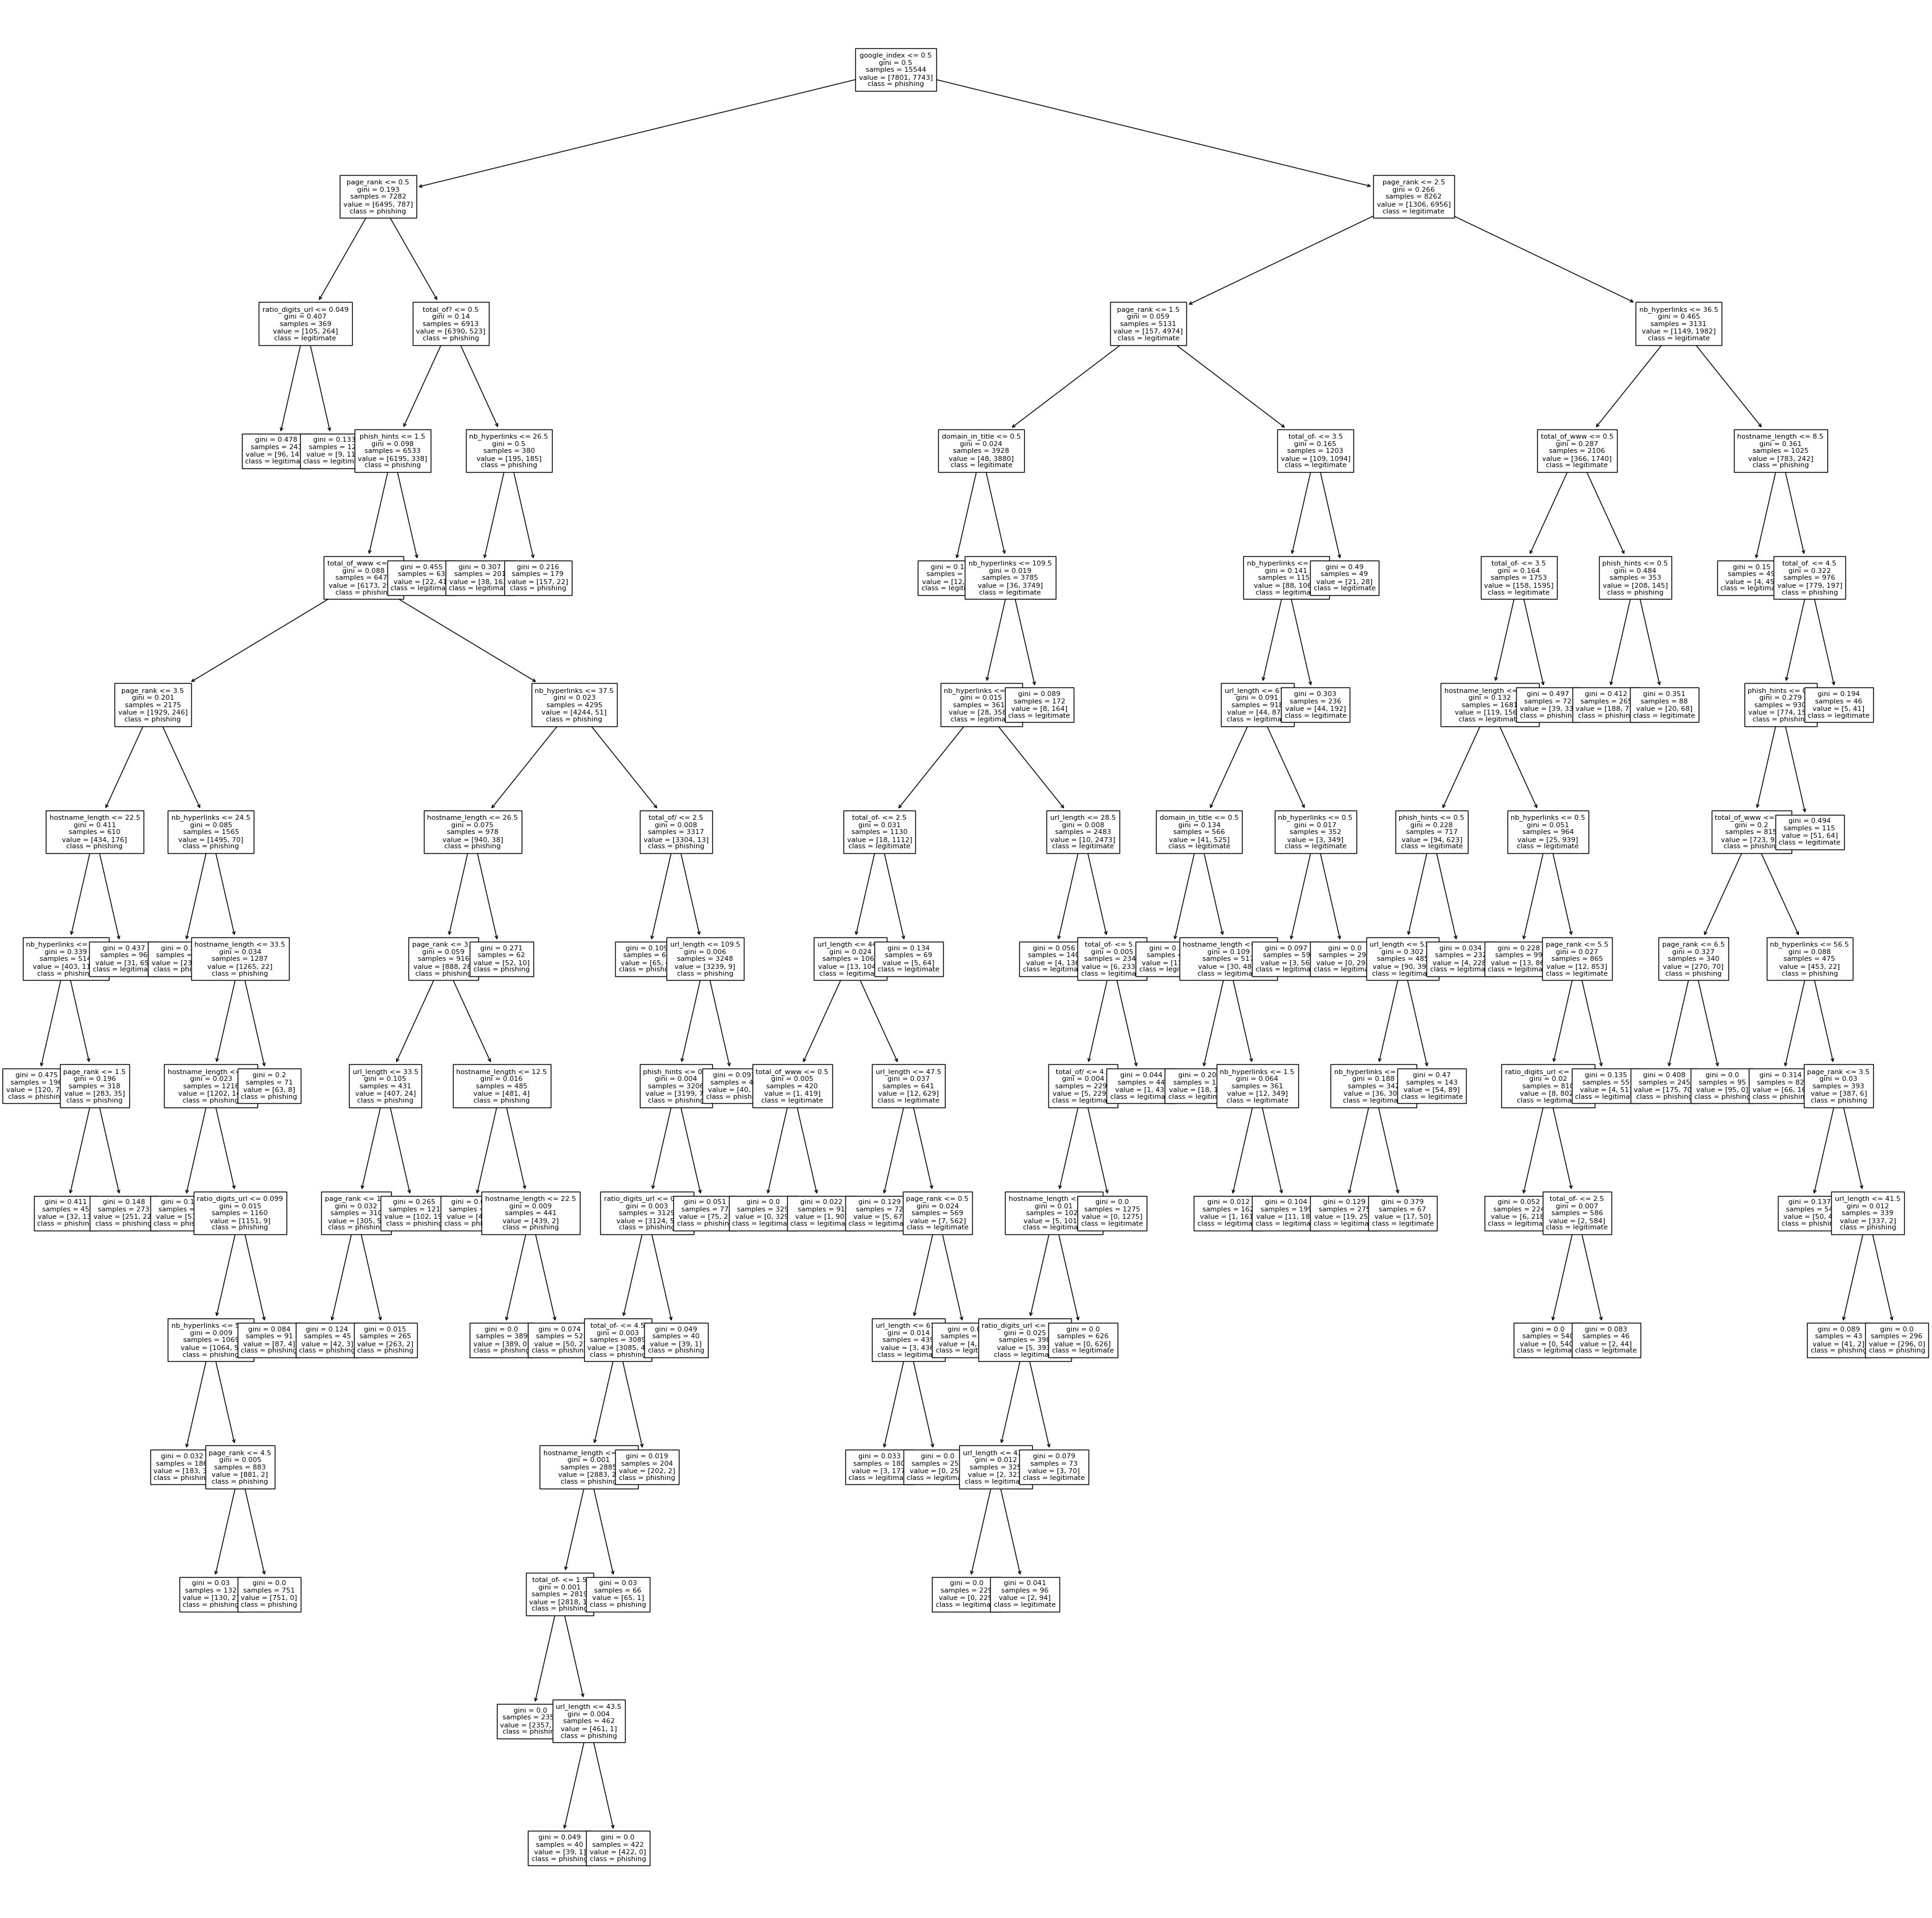

In [30]:
target_names = ["phishing", "legitimate"]
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
from sklearn.tree import plot_tree
plot_tree(decision_tree, fontsize=8, feature_names=selected_features, class_names=target_names)
plt.show()

## 🌳 Decision Tree with ADA Boosting

Boost the decision tree with ADA boosting and turns out, the performance (accuracy) increases by 2%.

In [31]:
# AdaBoost with decision trees
from sklearn.ensemble import AdaBoostRegressor
adaboost_decision_tree = AdaBoostRegressor(estimator=decision_tree, n_estimators=50, random_state=21)
X_train = X_train.astype(float) 
y_train = y_train.astype(float)
adaboost_decision_tree.fit(X_train, y_train)
ada_dt_score = adaboost_decision_tree.score(X_test, y_test)
print("Accuracy:", ada_dt_score)

Accuracy: 0.944418199439675


## 🌳🌳🌳 Random Forest Regressor


This code uses a machine learning method called Random Forest, which creates a powerful model by combining many decision trees. It trains this model with training data and evaluates its accuracy with test data, displaying the accuracy score.

In [32]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 500, max_depth=25, n_jobs=-1)
random_forest.fit(X_train, y_train)
rf_score = random_forest.score(X_test, y_test)
print("Accuracy:", rf_score)

Accuracy: 0.9399239597187502


## 🌳🌳🌳 Random Forest with ADA Boosting

This code sets up a method called AdaBoost with Random Forest, a technique that boosts the performance of a random forest model. It trains this boosted model with training data and evaluates its accuracy with test data, displaying the accuracy score.

In [33]:
# AdaBoost with Random Forest
from sklearn.ensemble import AdaBoostRegressor

adaboost_random_forest = AdaBoostRegressor(estimator=random_forest, n_estimators=50, random_state=21)
adaboost_random_forest.fit(X_train, y_train)
ada_rf_score = adaboost_random_forest.score(X_test, y_test)
print("Accuracy:", ada_rf_score)

Accuracy: 0.9576248392484179


# Apply Stacking


This code combines different prediction methods (like linear regression and random forest) into one super method called Stacking Regressor. It learns from data and gives a score showing how accurate its predictions are.

In [34]:
from sklearn.ensemble import StackingRegressor

# A list of tuples with the name of the model and the model itself
estimators_list = [
    ('linear_regression', linear),
    ('random_forest', random_forest),
    ('adaboost', adaboost_decision_tree),
    ('adaboost_random_forest', adaboost_random_forest)
]

stacking_regressor = StackingRegressor(estimators=estimators_list, final_estimator=RandomForestRegressor(n_estimators=50, max_depth=25, n_jobs=-1))
stacking_regressor.fit(X_train, y_train)
stack_regressor_score = stacking_regressor.score(X_test, y_test)
print("Accuracy:", stack_regressor_score)

Accuracy: 0.9518657489977174


# Comparing the performance of different models. 

It prints a comparison report displaying each model's performance score. Finally, it identifies the best performing model by finding the model with the highest score and prints its name along with its score.

In [36]:
# List of models and their scores
model_scores = {
    "Linear Regression": linear_score,
    "Decision Tree": DT_score,
    "Random Forest": rf_score,
    "K-Nearest Neighbors": KNN_score,
    "Support Vector Machine (SVM)": SVM_score
}

# Print comparison report
print("Model Comparison Report:")
print("=========================")
for model, score in model_scores.items():
    print(f"{model}: {score:.4f}")

# Find the best performing model
best_model = max(model_scores, key=model_scores.get)
print(f"\nThe best performing model is: {best_model} with a score of {model_scores[best_model]:.4f}")


Model Comparison Report:
Linear Regression: 0.6846
Decision Tree: 0.9313
Random Forest: 0.9399
K-Nearest Neighbors: 0.9025
Support Vector Machine (SVM): 0.8351

The best performing model is: Random Forest with a score of 0.9399


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for each model
param_grid_linear = {
    # Define hyperparameters for Linear Regression if needed
}

param_grid_decision_tree = {
    # Define hyperparameters for Decision Tree
    'min_samples_leaf': [10, 20, 30, 40],
    'min_samples_split': [100, 200, 300, 400]
}

param_grid_random_forest = {
    # Define hyperparameters for Random Forest
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

param_grid_knn = {
    # Define hyperparameters for KNN
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    # Define hyperparameters for SVM
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Define GridSearchCV for each model
grid_search_linear = GridSearchCV(LinearRegression(), param_grid_linear, cv=5)
grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_decision_tree, cv=5)
grid_search_random_forest = GridSearchCV(RandomForestClassifier(), param_grid_random_forest, cv=5)
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)

# Perform grid search for each model
grid_search_linear.fit(X_train, y_train)
grid_search_decision_tree.fit(X_train, y_train)
grid_search_random_forest.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

# Print best hyperparameters for each model
print("Best hyperparameters for Linear Regression:", grid_search_linear.best_params_)
print("Best hyperparameters for Decision Tree:", grid_search_decision_tree.best_params_)
print("Best hyperparameters for Random Forest:", grid_search_random_forest.best_params_)
print("Best hyperparameters for KNN:", grid_search_knn.best_params_)
print("Best hyperparameters for SVM:", grid_search_svm.best_params_)
